В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:

кількість шарів;

кількість нейронів;

функції активації;

кількість епох;

розмір батчу;

вибір оптимізатора;

різні техніки регуляризації і т.д.

Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.

Рішення оформіть у вигляді окремого ноутбука.

Epoch 1/10
750/750 [==============================] - 32s 40ms/step - loss: 0.5887 - precision: 0.8648 - val_loss: 0.4248 - val_precision: 0.8798
Epoch 2/10
750/750 [==============================] - 29s 39ms/step - loss: 0.3685 - precision: 0.8939 - val_loss: 0.3402 - val_precision: 0.8970
Epoch 3/10
750/750 [==============================] - 29s 39ms/step - loss: 0.3144 - precision: 0.9067 - val_loss: 0.3079 - val_precision: 0.9106
Epoch 4/10
750/750 [==============================] - 29s 38ms/step - loss: 0.2829 - precision: 0.9132 - val_loss: 0.3079 - val_precision: 0.9056
Epoch 5/10
750/750 [==============================] - 29s 39ms/step - loss: 0.2572 - precision: 0.9200 - val_loss: 0.2721 - val_precision: 0.9164
Epoch 6/10
750/750 [==============================] - 29s 38ms/step - loss: 0.2396 - precision: 0.9250 - val_loss: 0.2743 - val_precision: 0.9138
Epoch 7/10
750/750 [==============================] - 29s 38ms/step - loss: 0.2178 - precision: 0.9319 - val_loss: 0.2628 - 

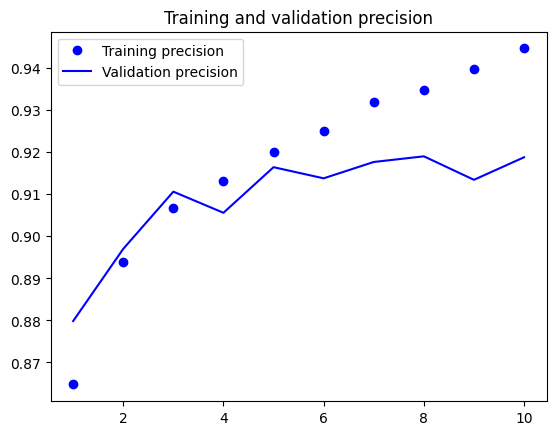

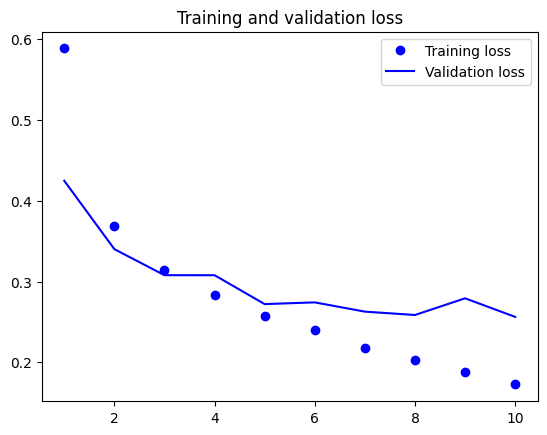

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Створення архітектури моделі
model = models.Sequential()

# Додавання шарів
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Згорткові шари перетворюють вихідні дані у форму, придатну для введення у повністю з'єднані шари
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Компіляція моделі з використанням метрики precision
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Precision()])

# Навчання моделі
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Оцінка метрики precision на тестових даних
precision = model.evaluate(test_images, test_labels)[1]
print(f'Test precision: {precision}')

# Виведення графіків навчання
import matplotlib.pyplot as plt

precision = history.history['precision']
val_precision = history.history['val_precision']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(precision) + 1)

plt.plot(epochs, precision, 'bo', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
